# Optimization benchmark for non-convex sample functions

Functions evaluated:

- [Branin](https://www.sfu.ca/~ssurjano/branin.html)
- [Rosenbrock](https://en.wikipedia.org/wiki/Rosenbrock_function)
- [Rastrigin](https://en.wikipedia.org/wiki/Rastrigin_function)

In [1]:
import time
import json
import math
import itertools
import numpy as np
import pandas as pd
from math import pi, cos, sqrt
from timeit import default_timer as timer

evaluation_delay = 0

# Optima in [-5, 10] x [0, 15]
branin_minima = [(-pi, 12.275), (pi, 2.275), (9.42478, 2.475)]
def branin(x):
    a=1
    b=5.1/(4*pi**2)
    c=5/pi
    r=6
    s=10
    t=1/(8*pi)
    return a*(x[1]-b*x[0]**2+c*x[0]-r)**2 + s*(1-t)*cos(x[0])+s  

ROSENBROCK_N = 10
rosenbrock_minima = [(1,) * ROSENBROCK_N]
def rosenbrock(x):
    return sum(100.0*(np.array(x[1:])-np.array(x[:-1])**2.0)**2.0 + (1-np.array(x[:-1]))**2.0)

RASTRIGIN_N = 10
# Optima in [-5.12, 5.12] x [-5.12, 5.12]
rastrigin_minima = [(0,) * RASTRIGIN_N]
def rastrigin(x):
    A = 10
    n = len(x)
    return A * n + sum([x_i**2 - A*math.cos(2*math.pi*x_i) for x_i in x])

def opt_error(x, minima):
    def l2_norm(x,y):
        return np.linalg.norm(np.array(x) - np.array(y))
    distances = [l2_norm(x,m) for m in minima]
    return min(distances)

functions = [
    {
        'function': branin,
        'initial_guesses': [np.zeros(2), 
                            np.ones(2),
                            np.random.rand(2)],
        'minima': branin_minima,
        'bounds': [(-5,10), (0,15)],
    }, 
    {
        'function': rosenbrock,
        'initial_guesses': [np.zeros(ROSENBROCK_N), 
                            np.random.rand(ROSENBROCK_N)*10-5],
        'minima': rosenbrock_minima,
        'bounds': [(-10,10)] * ROSENBROCK_N,
    }, 
    {
        'function': rastrigin,
        'initial_guesses': [np.ones(RASTRIGIN_N), 
                            np.random.rand(ROSENBROCK_N)*10-5],
        'minima': rastrigin_minima,
        'bounds': [(-5.12,5.12)] * RASTRIGIN_N,
    },
]

## Classical optimization

Optimization methods used (with different initial guesses tested):

- Nelder-Mead
- BFGS
- L-BFGS-B

In [2]:
from scipy.optimize import minimize
from IPython.display import display, HTML

methods = ['Nelder-Mead', 'BFGS', 'L-BFGS-B']


params_set = itertools.product(functions,            # Objective functions
                               methods)              # Optimization methods

results_df = pd.DataFrame()
for f, method in params_set:
    for initial_guess in f['initial_guesses']:
        function = f['function']
        start = timer()
        result = minimize(function, initial_guess, method=method)
        elapsed_time = timer() - start
        x = result['x']
        fun = result['fun']
        error = opt_error(x, f['minima'])
        success = result['success']
        nfev = result['nfev']
        nit = result['nit']
        results_df = results_df.append(
            {
                'function': function.__name__,
                'method': method,
                'initial_guess': initial_guess,
                'time': elapsed_time,
                'solution': x,
                'error': error,
                'n_samples': None,
                'iterations': nit,
                'evaluations': nfev,
                'prior_width': None,
                'success': success,
            }, ignore_index=True
        )

results_df

,function,method,initial_guess,time,solution,error,n_samples,iterations,evaluations,prior_width,success
0,branin,Nelder-Mead,"[0.0, 0.0]",0.005224,"[3.1416056975014306, 2.274984503003412]",2.025588e-05,None,80.0,152.0,None,1.0
1,branin,Nelder-Mead,"[1.0, 1.0]",0.003803,"[3.1415829149104244, 2.2750048974181087]",1.090076e-05,None,51.0,97.0,None,1.0
2,branin,Nelder-Mead,"[0.857089315955242, 0.3560612622966607]",0.004881,"[3.141585072615923, 2.2749922200737704]",1.086271e-05,None,53.0,101.0,None,1.0
3,branin,BFGS,"[0.0, 0.0]",0.002775,"[3.1415930165375796, 2.275001379635713]",1.426578e-06,None,7.0,30.0,None,1.0
4,branin,BFGS,"[1.0, 1.0]",0.002877,"[3.141592631249972, 2.2749983479801097]",1.652171e-06,None,6.0,24.0,None,1.0
5,branin,BFGS,"[0.857089315955242, 0.3560612622966607]",0.002957,"[3.1415926616119325, 2.2749999909268164]",1.211104e-08,None,9.0,33.0,None,1.0
6,branin,L-BFGS-B,"[0.0, 0.0]",0.001829,"[3.141592660281547, 2.275000108865417]",1.090709e-07,None,8.0,30.0,None,1.0
7,branin,L-BFGS-B,"[1.0, 1.0]",0.001907,"[3.141592553742522, 2.275000146264713]",1.770956e-07,None,9.0,33.0,None,1.0
8,branin,L-BFGS-B,"[0.857089315955242, 0.3560612622966607]",0.001891,"[3.1415925329698005, 2.2750001288644217]",1.765084e-07,None,9.0,33.0,None,1.0
9,rosenbrock,Nelder-Mead,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.102497,"[0.9581994239135405, 0.9204737947316217, 0.833...",2.201578e+00,None,1458.0,2000.0,None,0.0


## Bayesian optimization

- Model used: Gaussian process
- Number of samples: 1, 10, 20
- Optimization iterations: 10, 20, 50, 100
- (Flat) prior for the optimum: No prior, very specific prior, less specific prior

In [3]:
import math
import sys
import os
from functools import reduce
from contextlib import redirect_stdout
from hypermapper import optimizer
from concurrent.futures import ProcessPoolExecutor

N_CORES = 1
N_PRIOR_BINS = 10
DEBUG = False

def function_wrapper(func):
    def wrapper(X):
        X2 = [X['x{}'.format(i+1)] for i in range(len(X))]
        return func(np.array(X2))
    return wrapper

def bo_optimization(f, model, n_samples, optim_iters, prior_width, experiment_num):
    example_scenario = {
        "application_name": "bo_tests_{}".format(experiment_num),
        "design_of_experiment": {
            "doe_type": "random sampling",
            "number_of_samples": n_samples
        },
        "optimization_objectives": ["Value"],
        "optimization_iterations": optim_iters,
        "models": {
            "model": model
        },
        "input_parameters" : {
        },
        #"print_posterior_best": True,
        #"print_best": True,
    }
    
    for i, bounds in enumerate(f['bounds']):            
        example_scenario['input_parameters']['x{}'.format(i+1)] = {
            'parameter_type': 'real',
            'values': bounds,
        }
        if prior_width != -1:
            a, b = f['bounds'][i]
            bounds_range = b - a
            m = f['minima'][0][i] # ith component of first minimum
            prior_bin = math.floor((m-a)/(b-a)*N_PRIOR_BINS)
            # Flat prior with "zero" probabilities equal to ALMOST_ZERO to avoid
            # numerical issues when taking logarithms
            ALMOST_ZERO = 1e-10
            prior = np.array([1 if abs(i-prior_bin) <= prior_width else ALMOST_ZERO for i in range(N_PRIOR_BINS)])
            prior = prior / sum(prior)
            example_scenario['input_parameters']['x{}'.format(i+1)]['prior'] = prior.tolist()

    scenario_file_path = "bo_optimization_scenario_{}.json".format(experiment_num)
    with open(scenario_file_path, "w") as scenario_file:
        json.dump(example_scenario, scenario_file, indent=4)

    stdout = sys.stdout # Jupyter uses a special stdout and HyperMapper logging overwrites it. Save stdout to restore later
    start = timer()
    with open(os.devnull, 'w') as devnull:
        if DEBUG:
            optimizer.optimize(scenario_file_path, function_wrapper(f['function']))
        else:
            with redirect_stdout(devnull):
                optimizer.optimize(scenario_file_path, function_wrapper(f['function']))
    elapsed_time = timer() - start
    sys.stdout = stdout

    df = pd.read_csv('bo_tests_{}_output_samples.csv'.format(experiment_num))
    best_found = df.sort_values('Value').iloc[1,:]

    x = list(best_found[0:len(f['bounds'])])
    error = opt_error(x, f['minima'])

    print('Test {} done.'.format(experiment_num))
    
    return {
            'function': f['function'].__name__,
            'method': 'BO',
            'initial_guess': None,
            'time': elapsed_time,
            'solution': x,
            'error': error,
            'n_samples': n_samples,
            'iterations': None,
            'evaluations': optim_iters,
            'prior_width': prior_width,
            'success': 1,
    }
       
pars = [
    functions,            # Objective functions
    ['gaussian_process'], # Model
    [1, 50, 500],          # Number of samples
    [10, 25, 50],        # Optimization iterations
    [-1, 1]            # Use prior?
]
params_set = itertools.product(*pars)           # Use prior?
num_combinations = reduce(lambda x,y:x*y, [len(p) for p in pars])

print('{} tests to perform...'.format(num_combinations))
with ProcessPoolExecutor(N_CORES) as executor:
    futures = []
    for i, (f, model, n_samples, optim_iters, prior_width) in enumerate(params_set):
        futures.append(executor.submit(bo_optimization, f, model, n_samples, optim_iters, prior_width, i))
        
    start = timer()
    results = [f.result() for f in futures]
    print('Total experiment time: {0:.2f} min'.format((timer() - start)/60))
    bo_results_df = pd.DataFrame(results)       
        
bo_results_df

54 tests to perform...


 /home/david/miniconda3/lib/python3.9/site-packages/GPy-1.10.0-py3.9-linux-x86_64.egg/GPy/util/normalizer.py:96: RuntimeWarning:invalid value encountered in true_divide


Experiment 0 done.
Experiment 1 done.
Experiment 2 done.
Experiment 3 done.
Experiment 4 done.
Experiment 5 done.
Experiment 6 done.
Experiment 7 done.
Experiment 8 done.
Experiment 9 done.
Experiment 10 done.
Experiment 11 done.
Experiment 12 done.
Experiment 13 done.
Experiment 14 done.
Experiment 15 done.
Experiment 16 done.
Experiment 17 done.
Experiment 18 done.
Experiment 19 done.
Experiment 20 done.
Experiment 21 done.
Experiment 22 done.
Experiment 23 done.
Experiment 24 done.
Experiment 25 done.
Experiment 26 done.
Experiment 27 done.
Experiment 28 done.
Experiment 29 done.
Experiment 30 done.
Experiment 31 done.
Experiment 32 done.
Experiment 33 done.
Experiment 34 done.
Experiment 35 done.
Experiment 36 done.
Experiment 37 done.
Experiment 38 done.
Experiment 39 done.
Experiment 40 done.
Experiment 41 done.
Experiment 42 done.
Experiment 43 done.
Experiment 44 done.
Experiment 45 done.
Experiment 46 done.
Experiment 47 done.
Experiment 48 done.
Experiment 49 done.
Experiment

,function,method,initial_guess,time,solution,error,n_samples,iterations,evaluations,prior_width,success
0,branin,BO,None,4.918745,"[10.0, 2.96472041520094]",0.755450,1,None,10,-1,1
1,branin,BO,None,8.765304,"[9.09054182846229, 1.840936523735984]",0.716765,1,None,10,1,1
2,branin,BO,None,12.700657,"[-3.152851363439665, 12.232266043099646]",0.044192,1,None,25,-1,1
3,branin,BO,None,23.381212,"[-3.1345461480758194, 12.26235901709623]",0.014472,1,None,25,1,1
4,branin,BO,None,34.390622,"[-3.136586382211913, 12.260447684311762]",0.015389,1,None,50,-1,1
5,branin,BO,None,53.136472,"[-3.149896036711532, 12.276060865900948]",0.008371,1,None,50,1,1
6,branin,BO,None,9.613064,"[3.1159910668865365, 2.272550497712225]",0.025719,50,None,10,-1,1
7,branin,BO,None,13.316223,"[-3.204695461135437, 12.112686194119023]",0.174149,50,None,10,1,1
8,branin,BO,None,23.423689,"[3.131655166299959, 2.3256867991418955]",0.051652,50,None,25,-1,1
9,branin,BO,None,29.000352,"[-3.0658112871977963, 12.39809088731154]",0.144548,50,None,25,1,1


In [4]:
df = results_df.append(bo_results_df)
df.to_csv('bo_optimization_comparison.csv')

## Comparison of BO parameters

<AxesSubplot:title={'center':'error'}, xlabel='evaluations'>

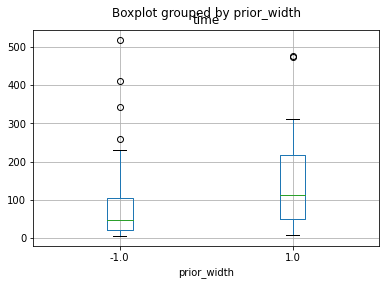

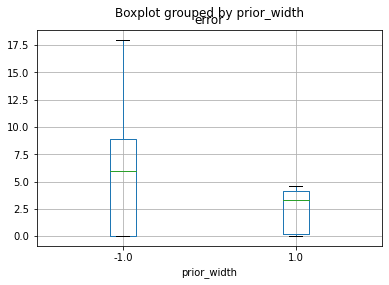

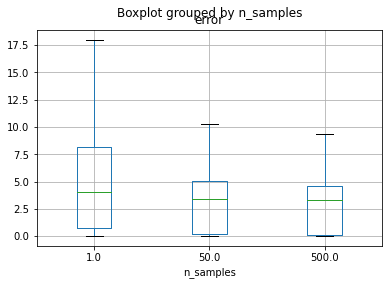

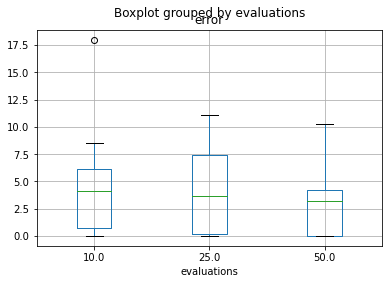

In [9]:
%matplotlib inline
df = pd.read_csv('bo_optimization_comparison.csv')
bo_df = df[df.method.eq('BO')]

bo_df.boxplot('time', by='prior_width')
bo_df.boxplot('error', by='prior_width')
bo_df.boxplot('error', by='n_samples')
bo_df.boxplot('error', by='evaluations')

## Comparison of branin function

<AxesSubplot:title={'center':'error'}, xlabel='evaluations'>

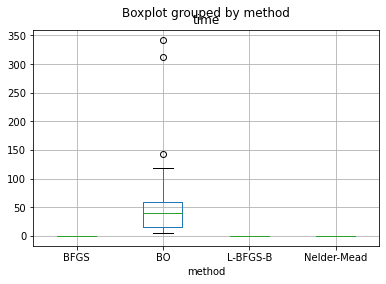

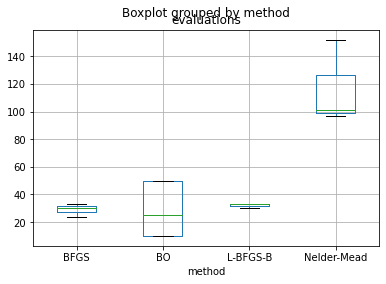

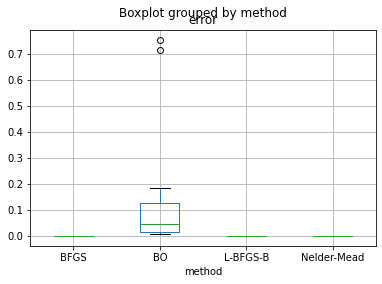

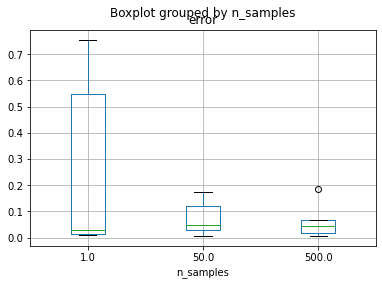

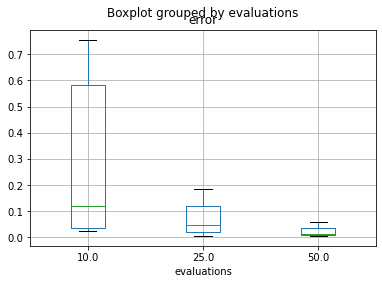

In [6]:
df_branin = df[df.function.eq('branin')]
df_branin.boxplot('time', by='method')
df_branin.boxplot('evaluations', by='method')
df_branin.boxplot('error', by='method')
df_branin.boxplot('error', by='n_samples')
df_branin[df_branin.method.eq('BO')].boxplot('error', by='evaluations')

## Comparison of rosenbrock function

<AxesSubplot:title={'center':'error'}, xlabel='evaluations'>

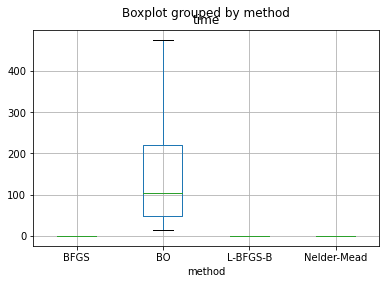

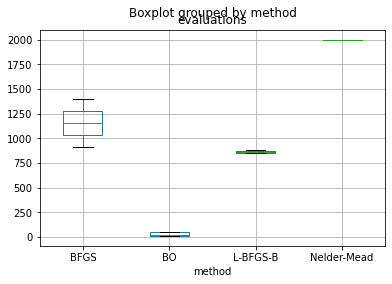

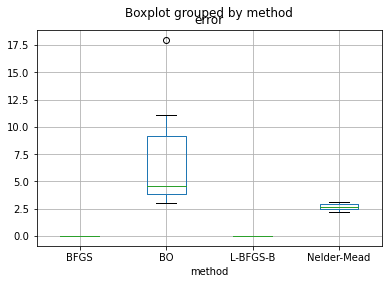

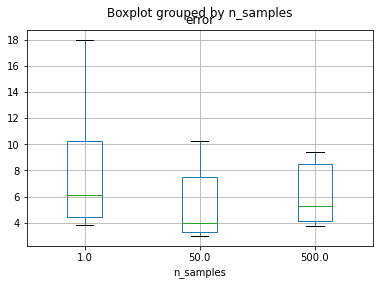

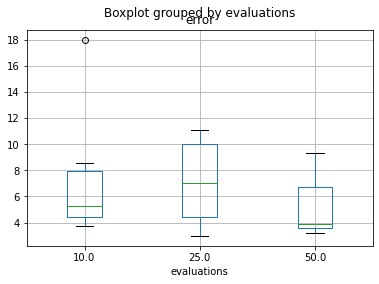

In [7]:
df_rosenbrock = df[df.function.eq('rosenbrock')]
df_rosenbrock.boxplot('time', by='method')
df_rosenbrock.boxplot('evaluations', by='method')
df_rosenbrock.boxplot('error', by='method')
df_rosenbrock.boxplot('error', by='n_samples')
df_rosenbrock[df_rosenbrock.method.eq('BO')].boxplot('error', by='evaluations')

## Comparison of rastrigin function

<AxesSubplot:title={'center':'error'}, xlabel='evaluations'>

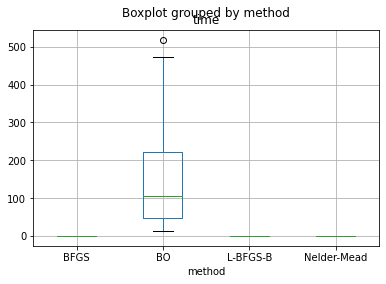

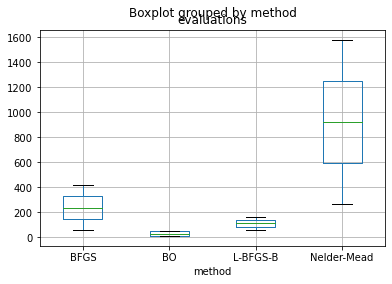

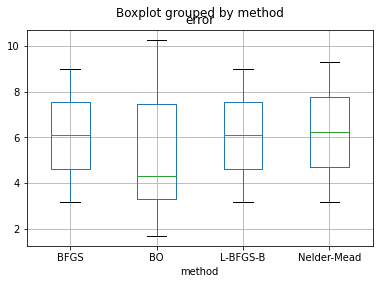

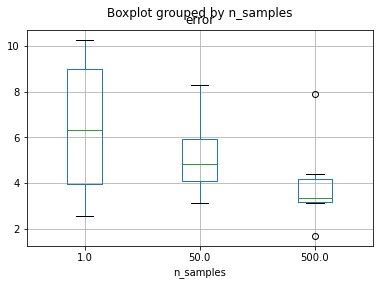

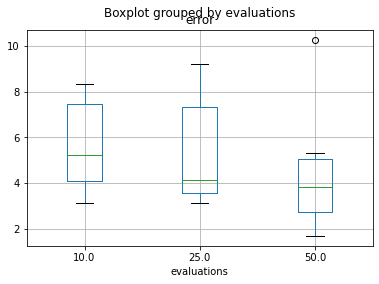

In [8]:
df_rastrigin = df[df.function.eq('rastrigin')]
df_rastrigin.boxplot('time', by='method')
df_rastrigin.boxplot('evaluations', by='method')
df_rastrigin.boxplot('error', by='method')
df_rastrigin.boxplot('error', by='n_samples')
df_rastrigin[df_rastrigin.method.eq('BO')].boxplot('error', by='evaluations')